# Classification and Regression
By: Adam Li

1. State Assumptions
2. Formally define a classification and regression problem
3. Provide an algorithm to solve classification/regression
4. Sample simulated data 
5. Compute accuracy
6. Plot accuracy vs. N
7. 

### Step 1: State Assumptions
$D = {d_1, ..., d_{96}}$ are our data columns representing f0, f1, ..., f3. Our assumption is that all variables/metrics come from a continuous distribution. 

In addition, $L = {x,y,z}$, our location data are continuous. 

### Step 2: Formally Define Classification/Regression Problem
Since our data is unsupervised, we want to just run some simple regressions on each column of data to see if we can predict a column based on the other 95 columns.

$$H_o: d_i, d_j \in D \ \forall \ i \neq j \ are\ independent$$ 
$$H_a: \exists i \neq j \ s.t. d_i \ dependent \ on \ d_j$$

D is our data matrix. i and j are indices.

### Step 3: Algorithm For Solving This Regression Problem
regression: linear regression, support vector regression, k-nearest neighbour regression, random forest regression, polynomial regression

Our regression model:



##### Class Notes
Bayes Optimal Classifier
g = argmin ( E[loss(g(x), y)] )
g = argmax(F(x=x|y=y)*F(y=y))
leave 1 out analysis
LDA
SVM
Logistic Regression
### Linear Discriminant Analysis
Under the assumption of F(x|y) = N(u, 1) and F(y) = Bernoulli(pi). Variances are same across classes.
- very interpretable
- fast 
- linear boundary 
### Quadratic Discriminant Analysis
Under similar assumptions, except assume variances are different across classes.
- interpretable
- fast
LDA and QDA converges to Bayes classifier under certain assumptions
### K-nearest neighbors
- not interpretable as LDA/QDA
- not fast
- consistent

In [1]:
# Import Necessary Libraries
import numpy as np
import os, csv

from matplotlib import pyplot as plt

import scipy

# Regression
from sklearn import cross_validation
from sklearn.cross_validation import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets

# Classification
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# pretty charting
import seaborn as sns
sns.set_palette('muted')
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Steps 4 & 5: Sample data from setting similar to data and record classification accuracy


In [2]:
np.random.seed(12345678)  # for reproducibility, set random seed
r = 20  # define number of rois
N = 100 # number of samples at each iteration
p0 = 0.10
p1 = 0.15
# define number of subjects per class
S = np.array((8, 16, 20, 32, 40, 64, 80, 100, 120, 200, 320,
              400, 600))
S = np.array((200,300))

names = ["Linear Regression", 
         "Support Vector Regression", 
         "Nearest Neighbors", 
         "Random Forest"] #, "Polynomial Regression"]

regressors = [
    LinearRegression(),
    SVR(kernel="linear", C=0.5, epsilon=0.01),
    KNeighborsRegressor(6, weights="distance"),
    RandomForestRegressor(max_depth=5, n_estimators=10, max_features=1)
    ]

In [27]:
errors = np.zeros((len(S), len(regressors), 2), dtype=np.dtype('float64'))

# sample data accordingly for each # of simulations
for idx1, s in enumerate(S):
    # null regression y = a + bx + episilon
    X = np.arange(0, s)
#     epsilon = np.random.normal(0, 0.5, s)
    eps_x = np.random.normal(0, 0.5, s)
    a = np.random.rand(s,)
    b = np.random.normal(s,)*5
    y = a + b*(X+eps_x)
    X, y, coef = datasets.make_regression(n_samples=s, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

    # reshape array to make it work with linear regression
#     y = y.reshape(-1,1)
    X = X.reshape(-1,1)
    
    for idx2, regr in enumerate(regressors):
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)
    
        # Train the model using the training sets
        reg = regr.fit(X_train, y_train)
        
        # leave one out analysis
#         loo = LeaveOneOut(len(X))
        loo = cross_validation.KFold(n=len(X), n_folds=10, shuffle=False, random_state=None)

        # compute scores for running this regressor
        scores = cross_validation.cross_val_score(reg, X, y, scoring='mean_squared_error', cv=loo)

        errors[idx1, idx2,] = [scores.mean(), scores.std()]
        print("MSE of %s: %f (+/- %0.5f)" % (names[idx2], scores.mean(), scores.std() * 2))
# print accuracy


MSE of Linear Regression: -98.030525 (+/- 67.16011)
MSE of Support Vector Regression: -818.494604 (+/- 663.41018)
MSE of Nearest Neighbors: -173.809540 (+/- 367.25922)
MSE of Random Forest: -152.351897 (+/- 245.77380)
MSE of Linear Regression: -97.929016 (+/- 30.06343)
MSE of Support Vector Regression: -137.314648 (+/- 56.80810)
MSE of Nearest Neighbors: -139.766465 (+/- 61.11190)
MSE of Random Forest: -122.361538 (+/- 43.24464)


In [28]:
print errors
print errors.shape

[[[ -98.0305249    33.58005539]
  [-818.4946042   331.70509207]
  [-173.80954049  183.62961076]
  [-152.35189737  122.88689903]]

 [[ -97.92901607   15.03171328]
  [-137.31464786   28.40405126]
  [-139.76646452   30.55595091]
  [-122.36153778   21.6223224 ]]]
(2, 4, 2)


## STEP 6: PLOTTING ACCURACY VS. N FOR EACH REGRESSOR


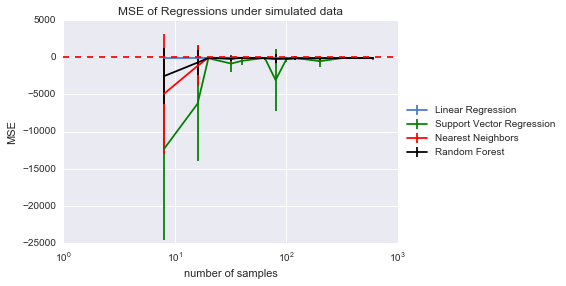

In [30]:
plt.errorbar(S, errors[:,0,0], yerr = errors[:,0,1], hold=True, label=names[0])
plt.errorbar(S, errors[:,1,0], yerr = errors[:,1,1], color='green', hold=True, label=names[1])
plt.errorbar(S, errors[:,2,0], yerr = errors[:,2,1], color='red', hold=True, label=names[2])
plt.errorbar(S, errors[:,3,0], yerr = errors[:,3,1], color='black', hold=True, label=names[3])
plt.xscale('log')
plt.xlabel('number of samples')
plt.ylabel('MSE')
plt.title('MSE of Regressions under simulated data')
plt.axhline(1, color='red', linestyle='--')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# null regression y = a + bx + episilon
x = np.random.normal(0, 1, s)
epsilon = np.random.normal(0, 0.05, s)
a = np.random.rand(s,) 
b = np.random.rand(s,)
y = a + b*x + epsilon
y = np.reshape(y, (s,1))
X = np.reshape(X, (s,1))

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

# Train the model using the training sets
# reg = SVR(kernel="linear", C=1.).fit(X_train, y_train)
reg = KNeighborsRegressor(5).fit(X_train, y_train)

print reg
print X.shape
print epsilon.shape
print y.shape

## STEP 7: APPLYING REGRESSIONS TO COLUMNS OF FEATURES



In [3]:
#### RUN AT BEGINNING AND TRY NOT TO RUN AGAIN - TAKES WAY TOO LONG ####
csvfile = "data_normalized/shortenedFeatures_normalized.txt"

# load in the feature data
list_of_features = []
with open(csvfile) as file:
    for line in file:
        inner_list = [float(elt.strip()) for elt in line.split(',')]
        
        # create list of features
        list_of_features.append(inner_list)

# conver to a numpy matrix
list_of_features = np.array(list_of_features)
print list_of_features.shape

(1119299, 96)


In [4]:
sub_features = list_of_features[:,1:]
print sub_features.shape

# Keep only first 96 features
# X = X[np.random.choice(range(X.shape[0]),size=100000,replace=False),0:24*4]

# randomly select n rows in list_of_features
num_rows = len(list_of_features)
X = list_of_features[np.random.choice(range(list_of_features.shape[0]), size=10000, replace=False), :]
print X.shape

(1119299, 95)
(10000, 96)


In [5]:
## Run regression on one column of the data
errors = np.zeros((len(list_of_features), 2)) # create a 1119299 x 2 matrix

# y = list_of_features[:,0]
# sub_features = list_of_features[:,1:]
num_cols = list_of_features.shape[1]

errors_cols = {}
for i in range(0, num_cols):
    y = X[:,i]
    
    indices = [p for p in range(0,96) if p != i]
    sub_features = X[:,indices]

    for idx, regr in enumerate(regressors):
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(sub_features, y, test_size=0.4, random_state=0)

        # create regression and fit
        reg = regr.fit(X_train, y_train)

        # leave one out & compute cross-validation scores with MSE
        loo = cross_validation.KFold(n=len(sub_features), n_folds=10, shuffle=False, random_state=None)
    #     loo = LeaveOneOut(len(sub_features))
        scores = cross_validation.cross_val_score(reg, sub_features, y, scoring='mean_squared_error', cv=loo)

        # get error scores and print 
        errors[idx,] = [scores.mean(), scores.std()]
        print("MSE's of %s: %f (+/- %0.2f)" % (names[idx], scores.mean(), scores.std())) 
    
    errors_cols[str(i)] = errors
# # print accuracy

MSE's of Linear Regression: -0.000097 (+/- 0.00)
MSE's of Support Vector Regression: -0.000098 (+/- 0.00)
MSE's of Nearest Neighbors: -0.001490 (+/- 0.00)
MSE's of Random Forest: -0.002404 (+/- 0.00)
MSE's of Linear Regression: -0.000066 (+/- 0.00)
MSE's of Support Vector Regression: -0.000068 (+/- 0.00)
MSE's of Nearest Neighbors: -0.001049 (+/- 0.00)
MSE's of Random Forest: -0.001569 (+/- 0.00)
MSE's of Linear Regression: -0.000175 (+/- 0.00)
MSE's of Support Vector Regression: -0.000176 (+/- 0.00)
MSE's of Nearest Neighbors: -0.001996 (+/- 0.00)
MSE's of Random Forest: -0.003663 (+/- 0.00)
MSE's of Linear Regression: -0.000330 (+/- 0.00)
MSE's of Support Vector Regression: -0.000332 (+/- 0.00)
MSE's of Nearest Neighbors: -0.004153 (+/- 0.00)
MSE's of Random Forest: -0.006514 (+/- 0.00)
MSE's of Linear Regression: -0.002056 (+/- 0.00)
MSE's of Support Vector Regression: -0.002212 (+/- 0.00)
MSE's of Nearest Neighbors: -0.005663 (+/- 0.00)
MSE's of Random Forest: -0.006944 (+/- 0.00)


## STEP 8: DISCUSSION:


MSE's of linear reg: -6.13 (+/- 4.81)


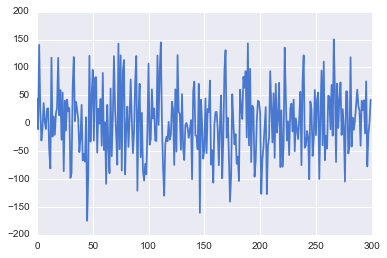

In [11]:
X, y, coef = datasets.make_regression(n_samples=300, n_features=1,
                                  n_informative=1, noise=1,
                                  coef=True, random_state=0)

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)
    
# create regression and fit
reg = regr.fit(X_train, y_train)

# leave one out & compute cross-validation scores with MSE
# loo = LeaveOneOut(len(X))
loo = cross_validation.KFold(n=len(X), n_folds=10, shuffle=False, random_state=None)
scores = cross_validation.cross_val_score(reg, X, y, scoring='mean_squared_error', cv=loo)

# get error scores and print 
errors[0,] = [scores.mean(), scores.std()]
print("MSE's of %s: %0.2f (+/- %0.2f)" % ('linear reg', scores.mean(), scores.std()))  
# reg = LinearRegression()

# regr = reg.fit(X,y)

plt.plot(y)

In [16]:
errors_mse = {}
for key in errors_cols.keys():
    errors = errors_cols[key]
    errors_mse[key] = np.mean(errors,axis=0)

In [28]:
# write new list_of_features to new txt file
csvfile = "data_normalized/mse_regressions_features.txt"

#Assuming res is a flat list
with open(csvfile, "w") as output:
    # write to new file the data
    writer = csv.writer(output, lineterminator='\n')
    for key in errors_mse.keys():
        try:
            writer.writerow(errors_mse[key])
        except:
            print key

24


In [26]:
errors_mse['24'] = None